In [1]:
import sys
sys.path.append('../../../')
from src import openpopcon as op
import numpy as np
import matplotlib.pyplot as plt
OP_HOME = '../../../'

settingsfile = "./NSF_POPCON.yaml"
plotsettingsfile = "./plotsettings.yml"
scalinglawfile = f"{OP_HOME}/resources/scalinglaws.yml"

pc = op.POPCON(settingsfile=settingsfile, plotsettingsfile=plotsettingsfile, scalinglawfile=scalinglawfile)

[cache] index loaded from '/Users/pharr/Projects/OpenPOPCON/OpenPOPCON/resources/examples/NSF/../../../src/lib/__pycache__/phys_lib.get_Zeffs-13.py310.nbi'
[cache] data loaded from '/Users/pharr/Projects/OpenPOPCON/OpenPOPCON/resources/examples/NSF/../../../src/lib/__pycache__/phys_lib.get_Zeffs-13.py310.1.nbc'
[cache] index loaded from '/Users/pharr/Projects/OpenPOPCON/OpenPOPCON/resources/examples/NSF/../../../src/lib/__pycache__/phys_lib.get_reactivity-344.py310.nbi'
[cache] data loaded from '/Users/pharr/Projects/OpenPOPCON/OpenPOPCON/resources/examples/NSF/../../../src/lib/__pycache__/phys_lib.get_reactivity-344.py310.1.nbc'
[cache] index loaded from '/Users/pharr/Projects/OpenPOPCON/OpenPOPCON/resources/examples/NSF/../../../src/lib/__pycache__/phys_lib.get_reactivity-344.py310.nbi'
[cache] data loaded from '/Users/pharr/Projects/OpenPOPCON/OpenPOPCON/resources/examples/NSF/../../../src/lib/__pycache__/phys_lib.get_reactivity-344.py310.2.nbc'
[cache] index loaded from '/Users/pha

In [2]:
pc.run_POPCON()

(200,)
Setting up algorithm object
Solving power balance equations
Power balance solutions found. Populating output arrays.


Plotting Paux with levels [1.e-01 1.e+00 1.e+01 5.e+01 1.e+02 5.e+02 2.e+03] and options ['r', 3, '$P_{aux}$', 12, '%1.0e']
Plotting Pohmic with levels [0.11285699 0.28569832 0.45853965 0.63138098 0.80422231 0.97706364
 1.14990497 1.3227463  1.49558763 1.66842896] and options ['orange', 2, '$P_{OH}$', 12, '%1.1e']
Plotting Pbrems with levels [0.00103909 0.0650373  0.12903552 0.19303373 0.25703195] and options ['purple', 2, '$P_{brems}$', 12, '%1.0e']
Plotting H98 with levels [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] and options ['blue', 2, '$H_{98y2}$', 12, '%.1f']
Plotting betaN with levels [ 0.18818365  3.0778909   5.96759814  8.85730538 11.74701263] and options ['forestgreen', 2, '$\\beta_N$', 12, '%.d']


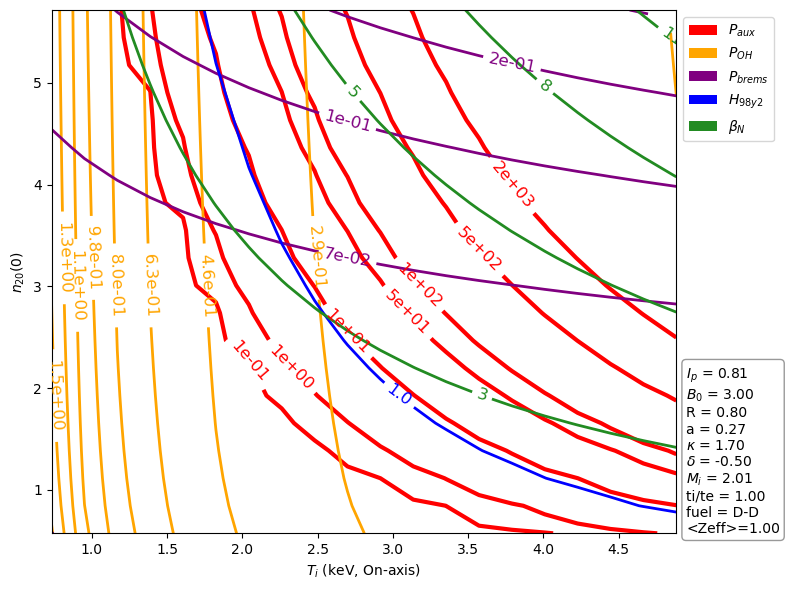

In [3]:
pc.update_plotsettings()
fig, ax = pc.plot()

In [ ]:
# pc.single_point(-1,0.6,12,True,show=True)

In [ ]:
import sys
import numpy as np
import os
import openpopcon_sf_geom_lc as pc

from scipy.integrate import IntegrationWarning
import warnings
warnings.filterwarnings('ignore',category=IntegrationWarning)

sys.path.append("../../")
sys.path.append(os.getcwd())

from yaml2arc import yaml2popcon
from popcon_lc import POPCON_run,POPCON_scan

#----------------------------------------------------------#
#                   CHANGE VARIABLES HERE
#----------------------------------------------------------#

# YAML file name (without .yaml extension) - this will be used to name output files as well
# filename = 'NARC1_base_universal_gamma'
# filename = 'NARC1_' + 'ND23_th' # IPB98y2, L89, ND23_kd, ND23_th, ND23_th_plus, ND23_th_minus
# filename = 'ITER'
# filename = 'ITER_like'
# filename = 'DIIID_NT_Reactor'
# filename = 'DIIID_NT_Reactor_ITERsize'
# filename = 'Toy'
filename = 'Cmod-NT'


# Toggle True to use a realistic EQDSK
geom = False
# eqdskfile = 'MANTA_a2023'
# eqdskfile = 'gITER_NT'
# eqdskfile = 'ITER_IBS_highres'
# eqdskfile = 'gDIII_pilot_ARCSIZE'
# eqdskfile = 'gDIII_pilot_q27'
# eqdskfile = 'gDIII_pilot_ARCSIZE'
# eqdskfile = 'gDIII_pilot_small'
# eqdskfile = 'gDIII_pilot_R30'
eqdskfile = 'gNT_CMOD_NSF'
# eqdskfile = 'cmod_nt_geqdsk'

# Set to False if you want to use raw YAML data
run_physics_corrections = False
# use_negd_taue_scaling = True
# Bmax=21
Bmax = 13.9349825813
# Bmax=10
# Bmax=7.8238 # ITER_NT
shield_b=0.0
# shield_b=0 # ITER_NT
q_goal=2.6
Z_eff_goal=1.5

# Change to format <str>,<list/np.ndarray> to scan over one or two variables. Leave as '',np.empty(0) otherwise
# scan1label,scan1vals = 'scalinglaw',np.asarray(['L89','ND23_th','IPB98y2'])
# scan2label,scan2vals = 'H',np.asarray([1,2])
# scan1label,scan1vals = 'scalinglaw',np.asarray(['ND23_th'])
# scan2label,scan2vals = 'H',np.asarray([1])
scan1label,scan1vals = 'scalinglaw',np.asarray(['L89','ND23_th','IPB98y2'])
scan2label,scan2vals = '',np.empty(0)

plot = True # Print matplotlib plot to screen (ignored for scans)
save_img = True # Save POPCON pdf plots to images/popcon folder
save_yaml = True
save_FULL = True

save_pkl = False # Save pickled POPCON objects to pickle folder (DON'T USE FOR NOW...)

#----------------------------------------------------------#
#                  DO NOT TOUCH UNDER HERE
#----------------------------------------------------------#

yamldir = os.path.dirname(__file__)+'/../yaml/'
eqdskdir = os.path.dirname(__file__)+'/../eqdsk/'
POP_ = pc.POPCON()
POPyaml = yaml2popcon(yamldir+filename,POP_)
POPyaml.geom,POPyaml.eqdsk_name= geom,f'{eqdskdir}{eqdskfile}'
POPyaml.maxit = 2000
POPyaml.doFort = False
POPyaml.ddscope = True
if scan1label != '' and scan1vals.size != 0:
    POPCON_scan(POPyaml,filename=filename,xlabel=scan1label,xvals=scan1vals,ylabel=scan2label,yvals=scan2vals,
                save_pkl=save_pkl,save_img=save_img,save_yaml=save_yaml,save_FULL=save_FULL,
                run_physics_corrections=run_physics_corrections,
                Bmax=Bmax,shield_b=shield_b,q_goal=q_goal,Z_eff_goal=Z_eff_goal)
else:
    POPCON_run(POPyaml,filename=filename,run_name=filename,plot=plot,
                save_pkl=save_pkl,save_img=save_img,save_yaml=save_yaml,save_FULL=save_FULL,
                run_physics_corrections=run_physics_corrections,
                Bmax=Bmax,shield_b=shield_b,q_goal=q_goal,Z_eff_goal=Z_eff_goal)

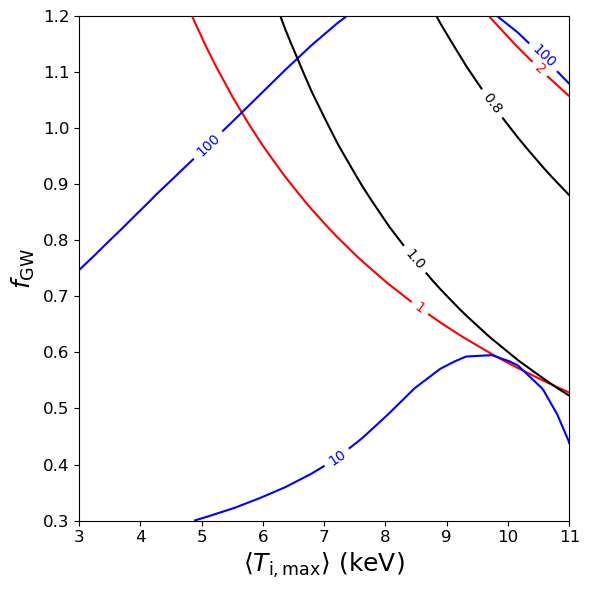

In [ ]:
## Example of how to make a manual plot

import matplotlib.pyplot as plt

pcdata = pc.outputs[0]


Paux = getattr(pcdata, 'Paux')
betaN = getattr(pcdata, 'betaN')
H98 = getattr(pcdata, 'H89')
fGW = getattr(pcdata, 'n_G_frac')
Ti = getattr(pcdata, 'T_i_avg')

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
fontsize = 18
labelsize = fontsize - 6

betaN_levels = [0,1,2]
cs1 = ax.contour(Ti, fGW, betaN, levels=betaN_levels, colors='r')
plt.clabel(cs1)

Paux_levels = [10,100]
cs2 = ax.contour(Ti, fGW, Paux, levels=Paux_levels, colors='b')
plt.clabel(cs2)

H98_levels = [0.2,0.4,0.6,0.8,1]
cs3 = ax.contour(Ti, fGW, H98, levels=H98_levels, colors='k')
plt.clabel(cs3)

ax.set_ylabel(r'$\it{f}_\mathrm{GW}$', fontsize=fontsize)
ax.set_xlabel(r'$\langle\it{T}_\mathrm{i,max}\rangle$ (keV)', fontsize=fontsize)
ax.tick_params(labelsize=labelsize)
plt.tight_layout()